# 그랜드 하얏트 제주 호텔 리뷰 심화 분석

# 개요

- 호텔 리뷰 점수에 영향을 미치는 다양한 요인을 정확히 파악하기 위해서는 데이터 기반의 분석 필요 <br>
- 분석을 통해 실질적인 문제점과 개선 방안을 도출, 서비스의 품질 & 고객 만족도를 향상시킬 수 있음 <br>

## 목적
고객 리뷰 데이터를 분석하여 문제점을 파악하고, 이를 바탕으로 한 서비스 개선(평점 향상) 전략을 제시하고자 함

## 목표

- 월별 리뷰 추이 파악
    - "월별로 전체 리뷰 수와 부정적 리뷰 수에 눈에 띄는 패턴이 있는가?"
- 세부 평점의 월별 분포
    - "세부 평점(예: 청결도, 응대, 위치 등)에서 월별로 분포에 특이사항이 있는가?"
- 성수기의 부정 리뷰 분석
    - "성수기에는 전체 리뷰 대비 부정적 리뷰가 더 많이 등장하는가?"
- 부정 리뷰 키워드 분석
    - 리뷰 텍스트에서 자주 등장하는 단어나 문구를 분석

## 데이터 출처
- [Tripadvisor의 그랜드하얏트제주 호텔 리뷰 데이터](https://www.tripadvisor.co.kr/Hotel_Review-g297885-d21364207-Reviews-Grand_Hyatt_Jeju-Jeju_Jeju_Island.html)를 스크래핑

트립어드바이저에서 수집된 리뷰만을 분석 대상으로 하기 때문에, <br>
정확한 투숙기간, 투숙객실 타입, 투숙객 정보 등과의 매칭은 이루어지지 않음

### 수집한 데이터
1. review_id(리뷰 고유번호 - 식별용)
2. member_id(리뷰 작성자 id - 식별용)
3. title(리뷰 제목)
4. rating_overall(종합 평점 - 5점 만점)
5. rating_date(리뷰 게시 날짜 - 년 + 월 + 일)
6. review_content(리뷰 내용)
7. stay_date(숙박 날짜 - 년 + 월)
8. trip_type(여행 유형)
9. rating_price(가격 평점 - 5점 만점)
10. rating_location(장소 평점 - 5점 만점)
11. rating_bed(침대의 퀄리티 평점 - 5점 만점)
12. rating_room(객실 평점 - 5점 만점)
13. rating_clean(청결도 평점 - 5점 만점)
14. rating_sevice(서비스 평점 - 5점 만점)

# Imports

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# Variables & Functions

In [48]:
RATING_COLS = ['종합 평점', '가격', '장소', '침대의 퀄리티', '객실', '청결도', '서비스']

In [53]:
def classify_nps(score):
    if score <= 3:
        return 'Detractor'
    elif score == 4:
        return 'Passive'
    else:
        return 'Promoter'

# Data

In [14]:
file_path = './data/grandhyattjeju_reviews.csv'
raw_data = pd.read_csv(file_path)
raw_data.head()

,리뷰ID,작성자ID,제목,내용,리뷰 날짜,숙박 날짜,여행 유형,종합 평점,가격,장소,침대의 퀄리티,객실,청결도,서비스
0,911372947,unwook0316,매우좋았음,깔끔하고 고급스러웠음<br/>수영장은 진짜 행복했음<br/>중국분들이 많이 여행오시...,2023년 8월 19일,2023년 8월,친구와 여행함,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1,910624346,pink1343,시설도 특급 서비스도 특급,아이들과 여행하기 정말 좋은 곳입니다. 육지에도 이런 시설과 서비스가 있는 호텔이 ...,2023년 8월 16일,2023년 8월,가족과 여행함,5.0,5.0,5.0,5.0,5.0,5.0,5.0
2,910612040,1971sjlee,고급인 객실상태,제주 노형동 위치해 있어 이동에 매우 편리한 입지를 자랑하는 그랜드 하얏트 제주는 ...,2023년 8월 16일,2023년 8월,커플로 여행함,4.0,2.0,3.0,4.0,4.0,4.0,3.0
3,910403922,satanica0306,기대보다 더좋았던..,기대보다 더좋았던 제주 하얏트. 다시가고싶은호델 1순위이고 수영장.조식은 정말마음...,2023년 8월 15일,2023년 8월,가족과 여행함,5.0,5.0,5.0,5.0,5.0,5.0,5.0
4,910142778,embalming2023,호캉스라는 걸 확실히 즐기게 해준 하얏트였어요,호캉스를 즐기고 싶은 분들께 추천해요. 야외수영장에서 비행기 날라갈때 사진 찍는것도...,2023년 8월 14일,2023년 8월,가족과 여행함,5.0,4.0,4.0,5.0,5.0,5.0,4.0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375 entries, 0 to 1374
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   리뷰ID     1375 non-null   int64  
 1   작성자ID    1375 non-null   object 
 2   제목       1375 non-null   object 
 3   내용       1375 non-null   object 
 4   리뷰 날짜    1375 non-null   object 
 5   숙박 날짜    1375 non-null   object 
 6   여행 유형    1368 non-null   object 
 7   종합 평점    1375 non-null   float64
 8   가격       1338 non-null   float64
 9   장소       1338 non-null   float64
 10  침대의 퀄리티  1334 non-null   float64
 11  객실       1327 non-null   float64
 12  청결도      1338 non-null   float64
 13  서비스      1344 non-null   float64
dtypes: float64(7), int64(1), object(6)
memory usage: 150.5+ KB


# EDA

In [36]:
df = raw_data.copy()

In [16]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
리뷰ID,1375.0,NaN,NaN,NaN,833393973.418909,36038971.392225,780695278.0,800218196.5,829986254.0,866800541.5,911372947.0
작성자ID,1375,1364,ljekkh,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
제목,1375,1256,그랜드 하얏트 제주,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
내용,1375,1375,깔끔하고 고급스러웠음<br/>수영장은 진짜 행복했음<br/>중국분들이 많이 여행오시...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
리뷰 날짜,1375,687,2022년 2월 7일,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
숙박 날짜,1375,32,2021년 2월,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
여행 유형,1368,5,가족과 여행함,760,NaN,NaN,NaN,NaN,NaN,NaN,NaN
종합 평점,1375.0,NaN,NaN,NaN,4.394182,1.129965,1.0,4.0,5.0,5.0,5.0
가격,1338.0,NaN,NaN,NaN,4.01719,1.072051,1.0,3.0,4.0,5.0,5.0
장소,1338.0,NaN,NaN,NaN,4.486547,0.89804,1.0,4.0,5.0,5.0,5.0


## 날짜 데이터

### 리뷰 날짜 재구조화

In [37]:
print(df['리뷰 날짜'][0])
pd.to_datetime(df['리뷰 날짜'], format='%Y년 %m월 %d일')

2023년 8월 19일


0      2023-08-19
1      2023-08-16
2      2023-08-16
3      2023-08-15
4      2023-08-14
          ...    
1370   2021-01-18
1371   2021-01-18
1372   2021-01-17
1373   2021-01-14
1374   2021-01-07
Name: 리뷰 날짜, Length: 1375, dtype: datetime64[ns]

In [38]:
df['리뷰 날짜'] = pd.to_datetime(df['리뷰 날짜'], format='%Y년 %m월 %d일')
df.head(1)

,리뷰ID,작성자ID,제목,내용,리뷰 날짜,숙박 날짜,여행 유형,종합 평점,가격,장소,침대의 퀄리티,객실,청결도,서비스
0,911372947,unwook0316,매우좋았음,깔끔하고 고급스러웠음<br/>수영장은 진짜 행복했음<br/>중국분들이 많이 여행오시...,2023-08-19,2023년 8월,친구와 여행함,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [20]:
df['리뷰 날짜'].min()

Timestamp('2021-01-07 00:00:00')

In [25]:
review_date_mask = (df['리뷰 날짜'] >= '2022-01-01') & (df['리뷰 날짜'] <= '2022-12-31')
df[review_date_mask].describe()

,리뷰ID,리뷰 날짜,종합 평점,가격,장소,침대의 퀄리티,객실,청결도,서비스
count,5.330000e+02,533,533.000000,525.000000,525.000000,520.000000,519.000000,524.000000,527.000000
mean,8.462195e+08,2022-06-23 02:52:54.484052480,4.347092,3.918095,4.481905,4.667308,4.572254,4.427481,4.351044
min,8.235927e+08,2022-01-01 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.320439e+08,2022-03-23 00:00:00,4.000000,3.000000,4.000000,5.000000,4.000000,4.000000,4.000000
50%,8.436305e+08,2022-06-20 00:00:00,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,8.619181e+08,2022-09-26 00:00:00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,8.732297e+08,2022-12-30 00:00:00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
std,1.608931e+07,NaN,1.126232,1.073162,0.883563,0.789434,0.884269,1.010693,1.181332


In [39]:
df['리뷰 작성 요일'] = df['리뷰 날짜'].dt.day_name().str.slice(0, 3)
df.head(1)

,리뷰ID,작성자ID,제목,내용,리뷰 날짜,숙박 날짜,여행 유형,종합 평점,가격,장소,침대의 퀄리티,객실,청결도,서비스,리뷰 작성 요일
0,911372947,unwook0316,매우좋았음,깔끔하고 고급스러웠음<br/>수영장은 진짜 행복했음<br/>중국분들이 많이 여행오시...,2023-08-19,2023년 8월,친구와 여행함,5.0,5.0,5.0,5.0,5.0,5.0,5.0,Sat


In [28]:
df['리뷰 작성 요일'].value_counts()

리뷰 작성 요일
Mon    273
Wed    223
Tue    213
Thu    189
Fri    173
Sun    164
Sat    140
Name: count, dtype: int64

### 숙박 날짜 재구조화

In [40]:
pd.to_datetime(df['숙박 날짜'], format='%Y년 %m월').dt.to_period('M')

0       2023-08
1       2023-08
2       2023-08
3       2023-08
4       2023-08
         ...   
1370    2021-01
1371    2021-01
1372    2021-01
1373    2021-01
1374    2021-01
Name: 숙박 날짜, Length: 1375, dtype: period[M]

In [41]:
print(df['숙박 날짜'][0])
df['숙박 날짜'] = pd.to_datetime(df['숙박 날짜'], format='%Y년 %m월').dt.to_period('M')
df.head(1)

2023년 8월


,리뷰ID,작성자ID,제목,내용,리뷰 날짜,숙박 날짜,여행 유형,종합 평점,가격,장소,침대의 퀄리티,객실,청결도,서비스,리뷰 작성 요일
0,911372947,unwook0316,매우좋았음,깔끔하고 고급스러웠음<br/>수영장은 진짜 행복했음<br/>중국분들이 많이 여행오시...,2023-08-19,2023-08,친구와 여행함,5.0,5.0,5.0,5.0,5.0,5.0,5.0,Sat


In [42]:
df['숙박월'] = df['숙박 날짜'].dt.month
df.head(1)

,리뷰ID,작성자ID,제목,내용,리뷰 날짜,숙박 날짜,여행 유형,종합 평점,가격,장소,침대의 퀄리티,객실,청결도,서비스,리뷰 작성 요일,숙박월
0,911372947,unwook0316,매우좋았음,깔끔하고 고급스러웠음<br/>수영장은 진짜 행복했음<br/>중국분들이 많이 여행오시...,2023-08-19,2023-08,친구와 여행함,5.0,5.0,5.0,5.0,5.0,5.0,5.0,Sat,8


In [44]:
df['숙박월'].value_counts().sort_index()

숙박월
1     139
2     158
3     142
4     119
5     124
6     115
7     115
8     103
9      78
10     88
11     92
12    102
Name: count, dtype: int64

In [46]:
monthly_avg_rating = df.groupby('숙박월').mean(numeric_only=True)
monthly_avg_rating.sort_values(by='종합 평점')

,리뷰ID,종합 평점,가격,장소,침대의 퀄리티,객실,청결도,서비스
숙박월,,,,,,,,
2,8.294198e+08,4.094937,3.888889,4.411765,4.565789,4.433333,4.307190,4.117647
8,8.362171e+08,4.145631,3.613861,4.346535,4.653465,4.514851,4.346535,4.148515
11,8.403783e+08,4.304348,3.966667,4.433333,4.688889,4.477778,4.488889,4.366667
12,8.475304e+08,4.313725,4.050000,4.530000,4.626263,4.565657,4.434343,4.366337
5,8.293167e+08,4.403226,3.876033,4.333333,4.641667,4.661017,4.529412,4.393443
1,8.325661e+08,4.431655,4.075188,4.601504,4.746269,4.704545,4.447761,4.278195
3,8.259270e+08,4.436620,4.230216,4.535714,4.776978,4.633094,4.585714,4.514286
10,8.403368e+08,4.443182,3.941860,4.511628,4.552941,4.476190,4.418605,4.379310
9,8.332262e+08,4.512821,3.974026,4.454545,4.675325,4.714286,4.623377,4.571429


## 여행 유형

In [51]:
df.groupby('여행 유형')[RATING_COLS].agg(['mean']).T

,여행 유형,가족과 여행함,나 혼자 여행함,출장 목적으로 여행함,친구와 여행함,커플로 여행함
종합 평점,mean,4.384211,4.357143,4.229167,4.457831,4.438753
가격,mean,3.981030,3.961538,3.957447,4.135802,4.067720
장소,mean,4.462060,4.615385,4.489362,4.543210,4.515837
침대의 퀄리티,mean,4.670285,4.538462,4.680851,4.716049,4.740319
객실,mean,4.604366,4.461538,4.510638,4.617284,4.673516
청결도,mean,4.471545,4.500000,4.234043,4.506173,4.575964
서비스,mean,4.376518,4.461538,4.063830,4.432099,4.469526


## 월별 NPS 계산

Net Promoter Score의 약자, 순고객 추천지수를 말함 <br>
서비스 업계의 핵심성과지표이며, 고객 로열티를 측정하는 방식임

- NPS 계산식
    - NPS = 추천고객비율(%) - 비추천고객비율(%)
- NPS 평가(전체 마켓에서 어떤 위치에 있는지가 더 중요)
    - 100 ~ 0: 개선이 필요한 점수
    - 0 ~ 30: 괜찮은 수준이지만 아직 개선의 여지가 있는 점수
    - 30 ~ 70: 훌륭한 수준의 점수
    - 70 ~ 100: 완벽한 수준의 점수

- NPS에서의 고객 분류
    - 0 - 6점 : 비추천고객(detractors)
    - 7 - 8점 : 중립고객(Passives)
    - 9 - 10점 : 추천고객(Promoters)

<br>

많은 연구결과로 10점의 점수가 아닌 7점 만점의 리뷰 점수, 5점 만점의 리뷰 점수에서도 NPS를 계산 가능함이 입증됨
- 1-4: 비추천고객, 5: 중립고객, 6-7: 추천고객
- 1-3: 비추천고객, 4: 중립고객, 5: 추천고객

고객 만족도 조사의 고질적인 문제점도 고려해야함
- 5점 비율이 확연히 많음(대충 만점을 주는 경우가 많음)

In [55]:
df['NPS_Category'] = df['종합 평점'].apply(classify_nps)
df.head(1)

,리뷰ID,작성자ID,제목,내용,리뷰 날짜,숙박 날짜,여행 유형,종합 평점,가격,장소,침대의 퀄리티,객실,청결도,서비스,리뷰 작성 요일,숙박월,NPS_Category
0,911372947,unwook0316,매우좋았음,깔끔하고 고급스러웠음<br/>수영장은 진짜 행복했음<br/>중국분들이 많이 여행오시...,2023-08-19,2023-08,친구와 여행함,5.0,5.0,5.0,5.0,5.0,5.0,5.0,Sat,8,Promoter


In [57]:
df['NPS_Category'].value_counts(normalize=True)

NPS_Category
Promoter     0.701091
Detractor    0.152000
Passive      0.146909
Name: proportion, dtype: float64

In [64]:
nps_counts = df.groupby(['숙박 날짜', 'NPS_Category']).size().unstack().fillna(0)
nps_counts['Total'] = nps_counts.sum(axis=1)
nps_counts['NPS_Score'] = (((nps_counts['Promoter'] - nps_counts['Detractor'])/nps_counts['Total'])*100).astype(int)
nps_counts

NPS_Category,Detractor,Passive,Promoter,Total,NPS_Score
숙박 날짜,,,,,
2021-01,5.0,4.0,27.0,36.0,61
2021-02,20.0,5.0,37.0,62.0,27
2021-03,7.0,9.0,35.0,51.0,54
2021-04,7.0,4.0,40.0,51.0,64
2021-05,6.0,5.0,43.0,54.0,68
2021-06,8.0,6.0,36.0,50.0,56
2021-07,7.0,3.0,44.0,54.0,68
2021-08,10.0,8.0,32.0,50.0,44
2021-09,6.0,5.0,32.0,43.0,60


# EDA - Visualization

## NPS

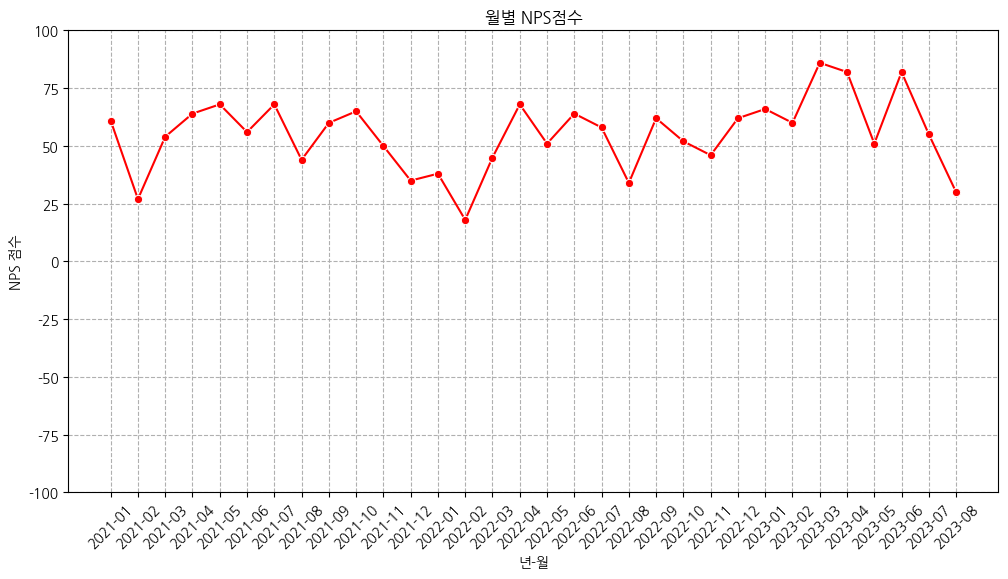

In [70]:
plt.figure(figsize=(12, 6))
nps_counts['Date_String'] = nps_counts.index.strftime('%Y-%m') # seaborn 은 데이트타임 타입을 받지 않아서 string으로 바꿈
sns.lineplot(x=nps_counts['Date_String'], y=nps_counts['NPS_Score'], marker='o', color='red')
plt.title('월별 NPS점수')
plt.xlabel('년-월')
plt.ylabel('NPS 점수')
plt.xticks(rotation=45)
plt.ylim(-100, 100)
plt.grid(axis='both', linestyle='--')
plt.show()

## 세부 평점 항목과 '종합 평점'의 월별 평균값

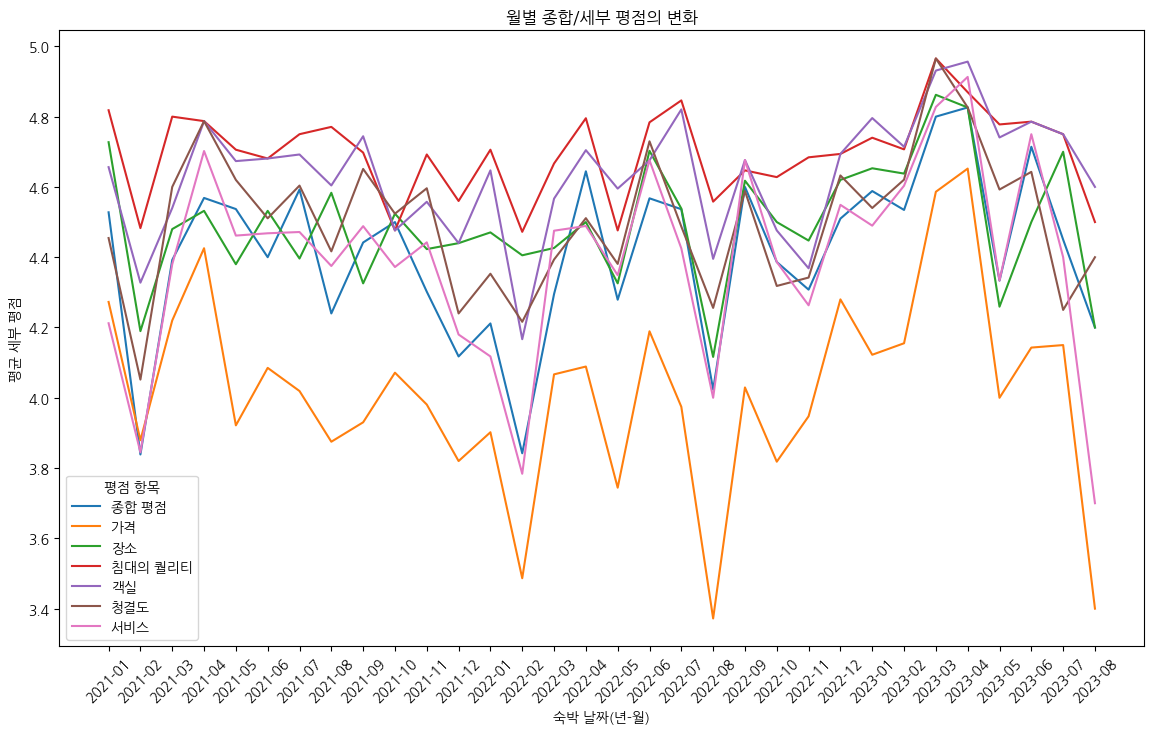

In [74]:
monthly_avg_rating_df = df.groupby('숙박 날짜')[RATING_COLS].mean().reset_index()
monthly_avg_rating_df['숙박 날짜'] = monthly_avg_rating_df['숙박 날짜'].astype(str)

plt.figure(figsize=(14, 8))

for col in RATING_COLS:
    sns.lineplot(data=monthly_avg_rating_df, x='숙박 날짜', y=col, label=col)

plt.xlabel('숙박 날짜(년-월)')
plt.ylabel('평균 세부 평점')
plt.title('월별 종합/세부 평점의 변화')
plt.xticks(rotation=45)
plt.legend(title='평점 항목')
plt.show()

- 종합 평점과 세부 평점의 추이는 비슷한 양상
- 23년 2월에 다른 성수기에 비해 평점 하략률이 많이 감소
- 2월과 7,8월 성수기에 평점이 하락

## 월별 전체/부정적 리뷰 수 패턴

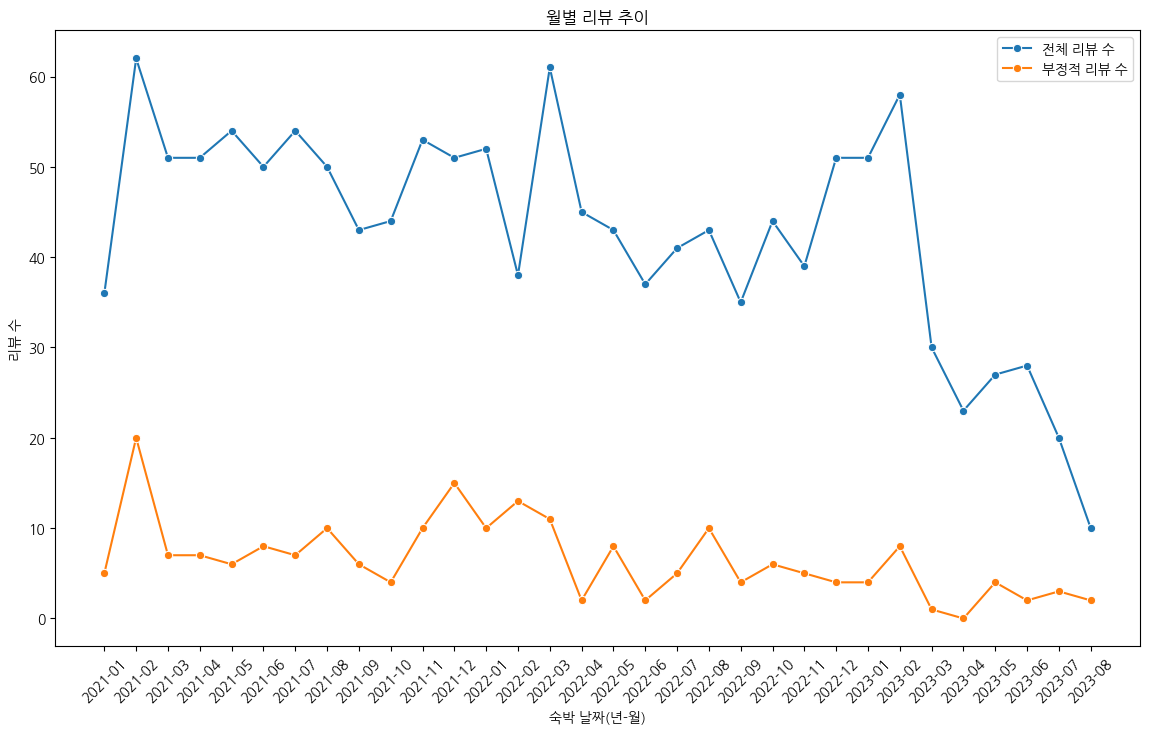

In [83]:
monthly_review_df = df.groupby('숙박 날짜').agg(
    전체_리뷰_수 = ('리뷰ID', 'count'),
    부정적_리뷰_수 = ('종합 평점', lambda x: (x <= 3).sum())
).reset_index()
monthly_review_df['숙박 날짜'] = monthly_review_df['숙박 날짜'].astype(str)

plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_review_df, x='숙박 날짜', y='전체_리뷰_수', label='전체 리뷰 수', marker='o')
sns.lineplot(data=monthly_review_df, x='숙박 날짜', y='부정적_리뷰_수', label='부정적 리뷰 수', marker='o')

plt.xticks(rotation=45)
plt.xlabel('숙박 날짜(년-월)')
plt.ylabel('리뷰 수')
plt.title('월별 리뷰 추이')

plt.show()

### Min-Max 정규화

패턴을 한눈에 더 잘 보기 위하여 Min-Max 정규화 진행

In [84]:
monthly_review_df['전체_리뷰_수_정규화'] = (monthly_review_df['전체_리뷰_수'] - monthly_review_df['전체_리뷰_수'].min()) / (monthly_review_df['전체_리뷰_수'].max() - monthly_review_df['전체_리뷰_수'].min())
monthly_review_df

,숙박 날짜,전체_리뷰_수,부정적_리뷰_수,전체_리뷰_수_정규화
0,2021-01,36,5,0.500000
1,2021-02,62,20,1.000000
2,2021-03,51,7,0.788462
3,2021-04,51,7,0.788462
4,2021-05,54,6,0.846154
5,2021-06,50,8,0.769231
6,2021-07,54,7,0.846154
7,2021-08,50,10,0.769231
8,2021-09,43,6,0.634615
9,2021-10,44,4,0.653846


In [85]:
monthly_review_df['부정적_리뷰_수_정규화'] = (monthly_review_df['부정적_리뷰_수'] - monthly_review_df['부정적_리뷰_수'].min()) / (monthly_review_df['부정적_리뷰_수'].max() - monthly_review_df['부정적_리뷰_수'].min())
monthly_review_df

,숙박 날짜,전체_리뷰_수,부정적_리뷰_수,전체_리뷰_수_정규화,부정적_리뷰_수_정규화
0,2021-01,36,5,0.500000,0.25
1,2021-02,62,20,1.000000,1.00
2,2021-03,51,7,0.788462,0.35
3,2021-04,51,7,0.788462,0.35
4,2021-05,54,6,0.846154,0.30
5,2021-06,50,8,0.769231,0.40
6,2021-07,54,7,0.846154,0.35
7,2021-08,50,10,0.769231,0.50
8,2021-09,43,6,0.634615,0.30
9,2021-10,44,4,0.653846,0.20


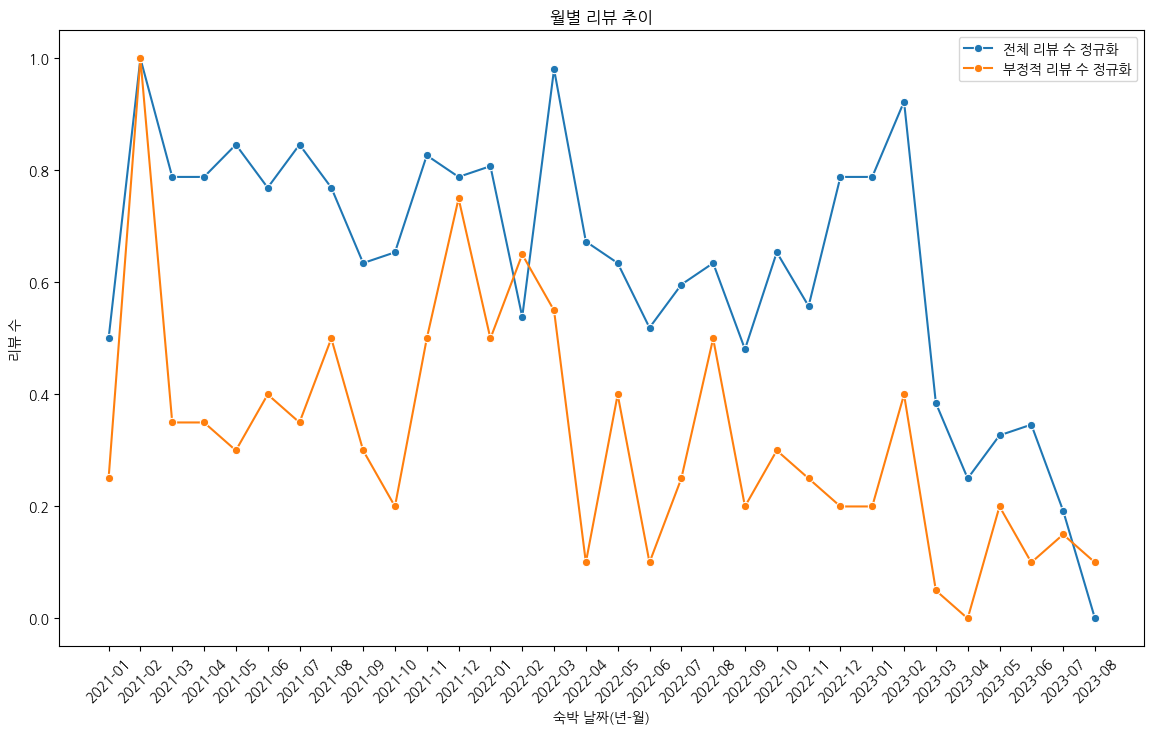

In [86]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_review_df, x='숙박 날짜', y='전체_리뷰_수_정규화', label='전체 리뷰 수 정규화', marker='o')
sns.lineplot(data=monthly_review_df, x='숙박 날짜', y='부정적_리뷰_수_정규화', label='부정적 리뷰 수 정규화', marker='o')

plt.xticks(rotation=45)
plt.xlabel('숙박 날짜(년-월)')
plt.ylabel('리뷰 수')
plt.title('월별 리뷰 추이')

plt.show()

- 2022년 2월에 전체 리뷰 수는 하락했으나 부정 리뷰의 수는 상승하는 이상치가 있었음

## 부정적 리뷰에 대한 세부 평점 항목의 월별 평균값 시각화

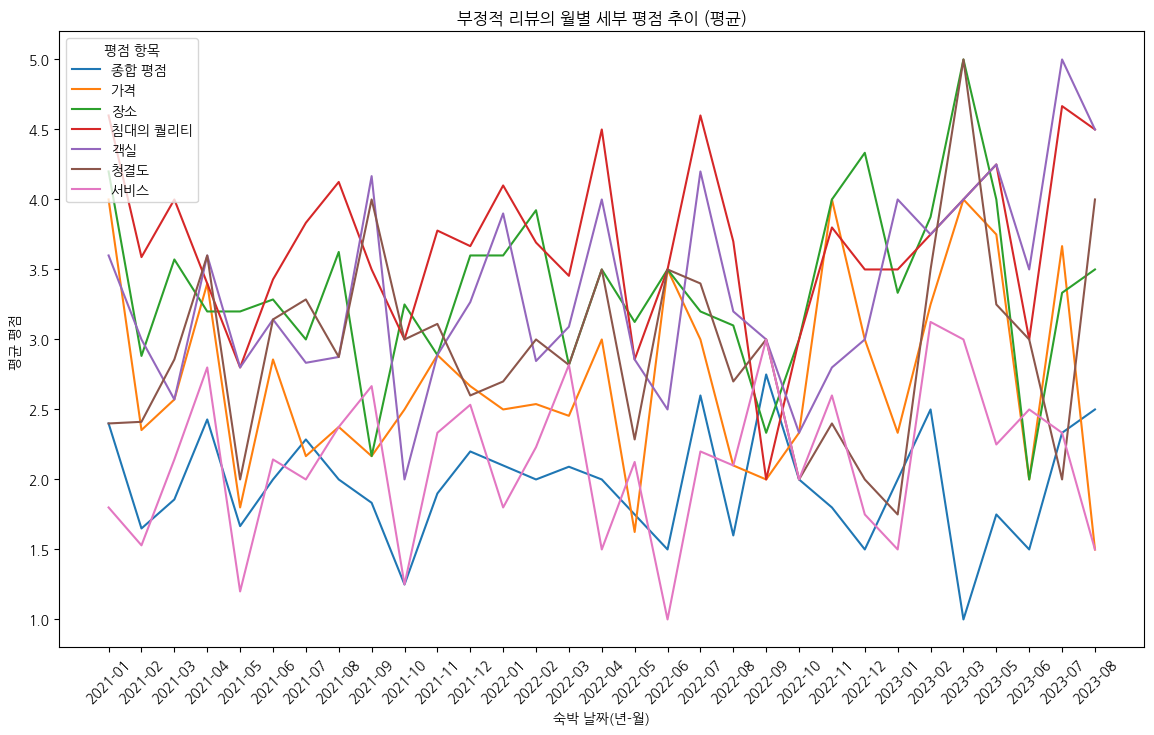

In [95]:
detractor_review_df = df[df['NPS_Category'] == 'Detractor']
monthly_avg_detractor_review_df = detractor_review_df.groupby('숙박 날짜')[RATING_COLS].mean().reset_index()
monthly_avg_detractor_review_df['숙박 날짜'] = monthly_avg_detractor_review_df['숙박 날짜'].astype(str)

plt.figure(figsize=(14, 8))

for col in RATING_COLS:
    sns.lineplot(data=monthly_avg_detractor_review_df, x='숙박 날짜', y=col, label=col)

plt.xlabel('숙박 날짜(년-월)')
plt.ylabel('평균 평점 ')
plt.title('부정적 리뷰의 월별 세부 평점 추이 (평균)')
plt.xticks(rotation=45)
plt.legend(title='평점 항목', loc='upper left')

plt.show()

## 부정적 리뷰에서의 각 세부 평점 항목과 종합 평점간의 상관 계수

[피어슨 상관 계수] <br>
두 변수간의 선형 상관 관계의 강도와 방향을 측정한 수치
- 1: 완벽한 양의 선형 상관 관계
- 0: 선형 상관 관계 없음
- -1: 완벽한 음의 선형 상관 관계

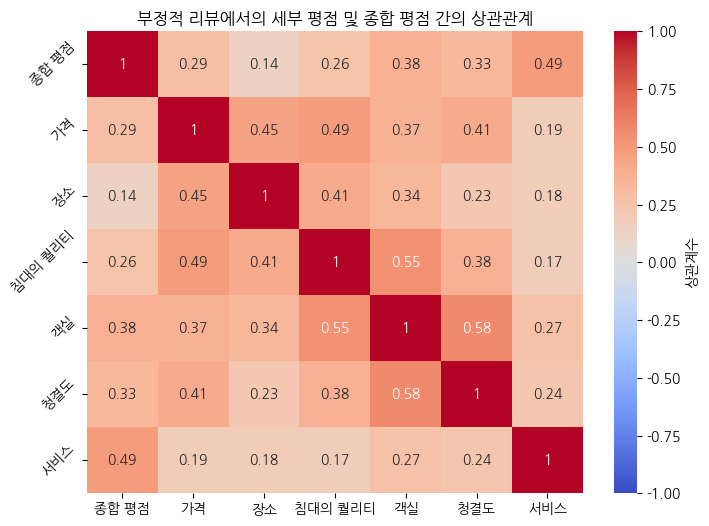

In [104]:
corr_matrix = detractor_review_df[RATING_COLS].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cbar_kws={'label':'상관계수'}, cmap='coolwarm')
plt.title('부정적 리뷰에서의 세부 평점 및 종합 평점 간의 상관관계')
plt.yticks(rotation=45)
plt.show()

- 서비스와 종합 평점의 상관관계가 있어보임

# 마무리

기타 내/외부 데이터와 결합하여 추가분석을 하는 것이 좋을 듯
- 객실 점유율, 투입 인원, 날씨(기온, 강수량) 등 

=> 다음 종합 평점 하락 시점 예측 => 추가 액션 플랜 제시

예를 들어, 
- 서비스 문제
    - HR => 내부 직원 턴오버/신규 입사자 교육 기간 등등 서비스에 기점을 둔 데이터와 비교
- 청결도 문제
    - 하우스키핑 => 외주업체 인원 배치/비용 데이터 추가 수집 및 분석
- 객실 문제
    - 시설부/하우스키핑 => 객실 하자 발생 빈도수 + 리스크 분석/관리

이와 같이 실무였다면, 추가 데이터를 수집하여 더 깊이 분석할 수 있었을 듯